<a href="https://colab.research.google.com/github/dheerajjoshim/machinelearningcourse/blob/master/Auto_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#The data concerns city-cycle fuel consumption in miles per gallon,
    #to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.
import numpy as np #python library for numerical functions
import pandas as pd #for making dataframes
import scipy.stats as stats #library for statistics functions like probability etc
import statsmodels.api as sm #python library for stats models
import matplotlib.pyplot as plt # to plot charts
import sklearn  #python library for linear models & others
from sklearn.linear_model import LinearRegression 

In [ ]:
from google.colab import files #loading data from google colab
uploaded = files.upload()

Saving auto-mpg-Copy.csv to auto-mpg-Copy (1).csv


In [ ]:
#loading data from csv file
#data = pd.read_csv('/var/ml/datasets/auto-mpg.csv') #It is used to read a csv(comma separated values) file  and convert to pandas dataframe.
#Pandas DataFrames is generally used for representing Excel Like Data In-Memory. 
#data.head()
import io
data = pd.read_csv(io.BytesIO(uploaded['auto-mpg-Copy.csv']))

data.head(5) #Read first 5 entries

,mpg_target,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
data.shape #shows number of rows & columns

(398, 9)

In [ ]:
data.describe() #to get statistics of the data

,mpg_target,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.402010,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.203079,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
data.corr()
#Ideal is for all I.V to be correlated to D.V but not with each other. That is I.V to I.V corr value should be less but IV to DV corr value should be more

,mpg_target,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg_target,1.000000,-0.775396,-0.804203,-0.772373,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.840020,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.894648,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.772373,0.840020,0.894648,1.000000,0.861463,-0.685311,-0.412561,-0.453095
weight,-0.831741,0.896017,0.932824,0.861463,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.685311,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.412561,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453095,-0.581024,0.205873,0.180662,1.000000


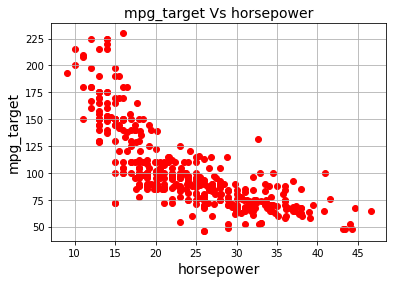

In [ ]:
#Plotting of graphs to see the collinearity between dependent & independent variable 
plt.scatter(data['mpg_target'], data['horsepower'], color='red')
plt.title('mpg_target Vs horsepower', fontsize=14)
plt.xlabel('horsepower', fontsize=14)
plt.ylabel('mpg_target',fontsize=14)
plt.grid(True)
plt.show()

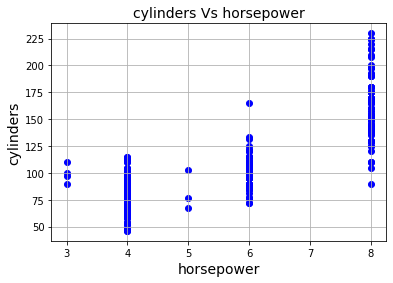

In [ ]:
#Plotting of graphs to see the collinearity
plt.scatter(data['cylinders'], data['horsepower'], color='blue')
plt.title('cylinders Vs horsepower', fontsize=14)
plt.xlabel('horsepower', fontsize=14)
plt.ylabel('cylinders',fontsize=14)
plt.grid(True)
plt.show()

[[ 1.         -0.77237323]
 [-0.77237323  1.        ]]
              mpg_target  cylinders  ...  model year    origin
mpg_target      1.000000  -0.775396  ...    0.579267  0.563450
cylinders      -0.775396   1.000000  ...   -0.348746 -0.562543
displacement   -0.804203   0.950721  ...   -0.370164 -0.609409
horsepower     -0.772373   0.840020  ...   -0.412561 -0.453095
weight         -0.831741   0.896017  ...   -0.306564 -0.581024
acceleration    0.420289  -0.505419  ...    0.288137  0.205873
model year      0.579267  -0.348746  ...    1.000000  0.180662
origin          0.563450  -0.562543  ...    0.180662  1.000000

[8 rows x 8 columns]


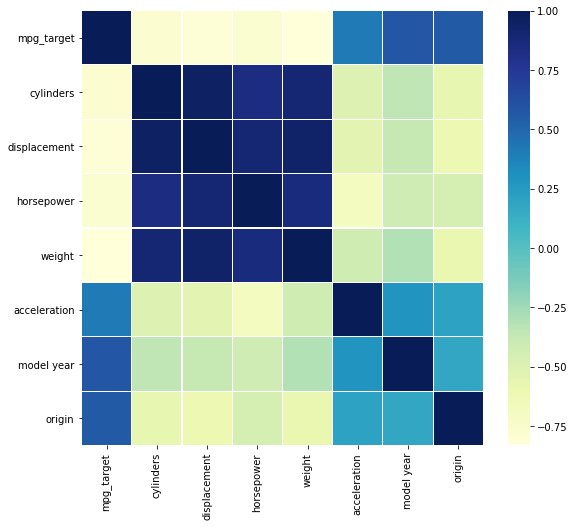

In [ ]:
i = np.corrcoef(data['mpg_target'],data['horsepower'])
print (i) 


corrmat = data.corr() 
print(corrmat)
import seaborn as sns 
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)




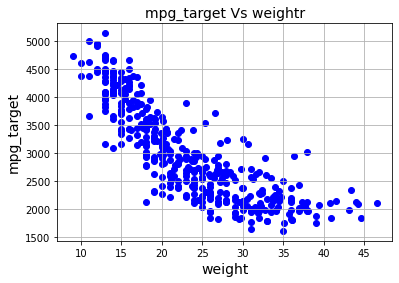

In [ ]:
plt.scatter(data['mpg_target'], data['weight'], color='blue')
plt.title('mpg_target Vs weightr', fontsize=14)
plt.xlabel('weight', fontsize=14)
plt.ylabel('mpg_target',fontsize=14)
plt.grid(True)
plt.show()

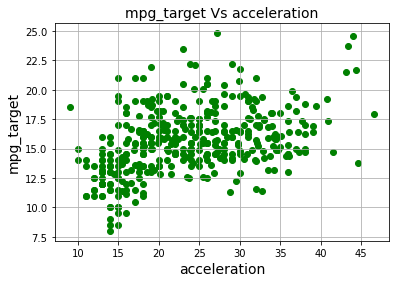

In [ ]:
plt.scatter(data['mpg_target'], data['acceleration'], color='green')
plt.title('mpg_target Vs acceleration', fontsize=14)
plt.xlabel('acceleration', fontsize=14)
plt.ylabel('mpg_target',fontsize=14)
plt.grid(True)
plt.show()

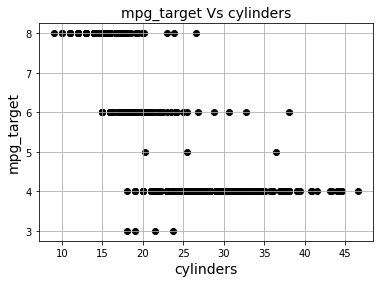

In [ ]:
plt.scatter(data['mpg_target'], data['cylinders'], color='black')
plt.title('mpg_target Vs cylinders', fontsize=14)
plt.xlabel('cylinders', fontsize=14)
plt.ylabel('mpg_target',fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
#Pandas DataFrames is generally used for representing Excel Like Data In-Memory. 
df = pd.DataFrame(data,columns=['mpg_target','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name'])


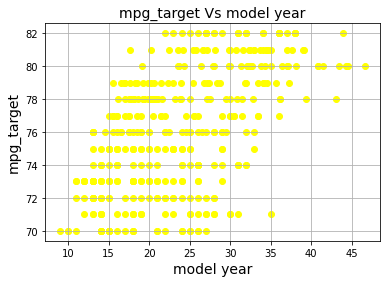

In [ ]:
plt.scatter(df['mpg_target'], df['model year'], color='yellow')
plt.title('mpg_target Vs model year', fontsize=14)
plt.xlabel('model year', fontsize=14)
plt.ylabel('mpg_target',fontsize=14)
plt.grid(True)
plt.show()

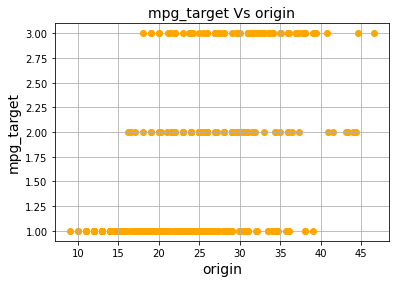

In [ ]:
plt.scatter(df['mpg_target'], df['origin'], color='Orange')
plt.title('mpg_target Vs origin', fontsize=14)
plt.xlabel('origin', fontsize=14)
plt.ylabel('mpg_target',fontsize=14)
plt.grid(True)
plt.show()

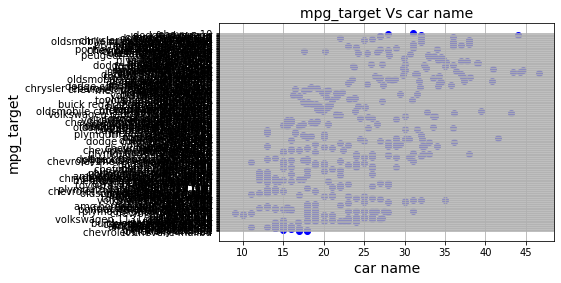

In [ ]:
plt.scatter(df['mpg_target'], df['car name'], color='Blue')
plt.title('mpg_target Vs car name', fontsize=14)
plt.xlabel('car name', fontsize=14)
plt.ylabel('mpg_target',fontsize=14)
plt.grid(True)
plt.show()

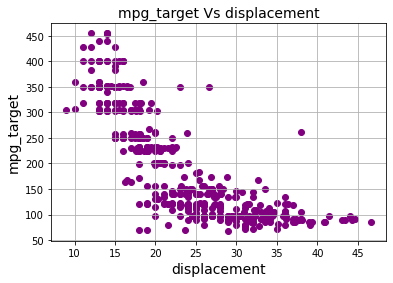

In [ ]:
plt.scatter(df['mpg_target'], df['displacement'], color='Purple')
plt.title('mpg_target Vs displacement', fontsize=14)
plt.xlabel('displacement', fontsize=14)
plt.ylabel('mpg_target',fontsize=14)
plt.grid(True)
plt.show()

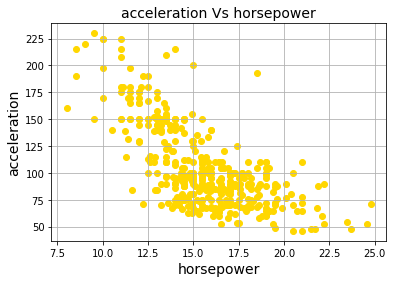

In [ ]:
#TO CHECK MULTICOLLINEARITY
plt.scatter(df['acceleration'], df['horsepower'], color='gold')
plt.title('acceleration Vs horsepower', fontsize=14)
plt.xlabel('horsepower', fontsize=14)
plt.ylabel('acceleration',fontsize=14)
plt.grid(True)
plt.show()

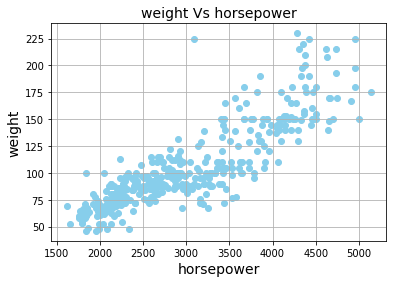

In [ ]:
plt.scatter(df['weight'], df['horsepower'], color='skyblue')
plt.title('weight Vs horsepower', fontsize=14)
plt.xlabel('horsepower', fontsize=14)
plt.ylabel('weight',fontsize=14)
plt.grid(True)
plt.show()

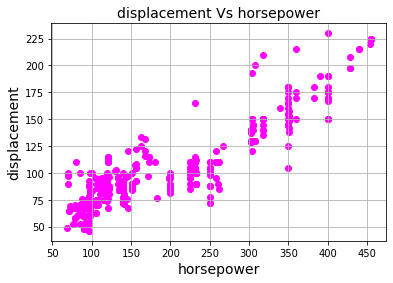

In [ ]:
plt.scatter(df['displacement'], df['horsepower'], color='magenta')
plt.title('displacement Vs horsepower', fontsize=14)
plt.xlabel('horsepower', fontsize=14)
plt.ylabel('displacement',fontsize=14)
plt.grid(True)
plt.show()

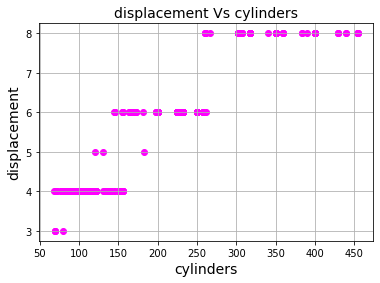

In [ ]:
plt.scatter(df['displacement'],df['cylinders'],color ='magenta')
plt.title('displacement Vs cylinders', fontsize=14)
plt.xlabel('cylinders', fontsize=14)
plt.ylabel('displacement',fontsize=14)
plt.grid(True)
plt.show()

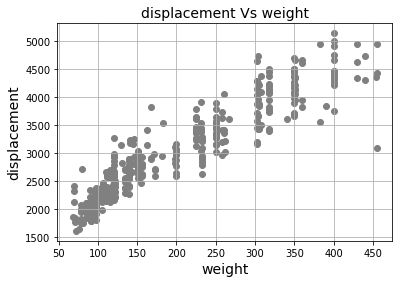

In [ ]:
plt.scatter(df['displacement'], df['weight'], color='grey')
plt.title('displacement Vs weight', fontsize=14)
plt.xlabel('weight', fontsize=14)
plt.ylabel('displacement',fontsize=14)
plt.grid(True)
plt.show()

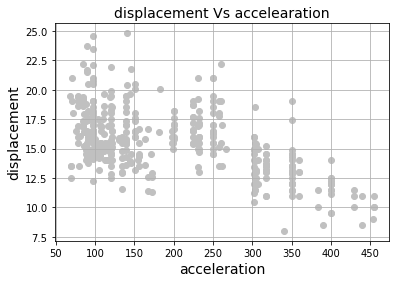

In [ ]:
plt.scatter(df['displacement'], df['acceleration'], color='silver')
plt.title('displacement Vs accelearation', fontsize=14)
plt.xlabel('acceleration', fontsize=14)
plt.ylabel('displacement',fontsize=14)
plt.grid(True)
plt.show()

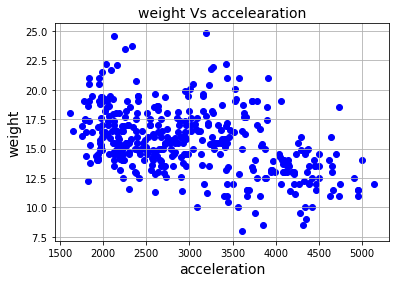

In [ ]:
plt.scatter(df['weight'], df['acceleration'], color='blue')
plt.title('weight Vs accelearation', fontsize=14)
plt.xlabel('acceleration', fontsize=14)
plt.ylabel('weight',fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
#Pandas DataFrames is generally used for representing Excel Like Data In-Memory. 
#df = pd.DataFrame(data,columns=['mpg_target','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name'])
#print(df.head())
#X = df[['horsepower']] #one variable 


X = data[['horsepower','weight']]  #multiple variable 
Y = data['mpg_target']
print(X)
print(Y)

     horsepower  weight
0           130    3504
1           165    3693
2           150    3436
3           150    3433
4           140    3449
..          ...     ...
393          86    2790
394          52    2130
395          84    2295
396          79    2625
397          82    2720

[398 rows x 2 columns]
0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg_target, Length: 398, dtype: float64


In [ ]:
# with sklearn
regr = LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
#print('Mean squared error: \n',(np.mean((regr.predict(X)-Y) ** 2)))
#print('variance score: \n',regr.score(X,Y))
#from sklearn import metrics  
#print('Mean Absolute Error:', metrics.mean_absolute_error(Y,(regr.predict(X))))

#print('Mean Squared Error:', metrics.mean_squared_error(Y, (regr.predict(X))))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y,(regr.predict(X)))))

#plt.scatter(regr.predict(X),Y)
#plt.show()

Intercept: 
 45.82826481701349
Coefficients: 
 [-0.04431582 -0.00595438]


In [ ]:

#This output includes the intercept and coefficients. 
#You can use this information to build the multiple linear regression equation as follows:

#mpg_target = (Intercept) + (horsepower coef)*X1 + (weight coef)*X2

#And once you plug the numbers:

#mpg_target = (45.82826481701349) + (-0.04431582)*X1 + (-0.00595438)*X2

# prediction with sklearn
New_horsepower = 167
New_weight = 3793
print ('Predicted mpg_target: \n', regr.predict([[New_horsepower,New_weight]]))
#mpg_target = (45.82826481701349) + (-0.04431582)*X1 + (-0.00595438)*X2
#mpg_target = (45.82826481701349)+(-0.04431582)* 167 + (-0.00595438)*3793)
#mpg_target = 45.82826481701349-7.40074194-22.58496334 = 15.842559537013

Predicted mpg_target: 
 [15.84256666]


In [ ]:
#Ordinary Least-Squares (OLS) Regression, is probably the most commonly used technique in Statistical Learning. 
#It is also the oldest, dating back to the eighteenth century and the work of Carl Friedrich Gauss and Adrien-Marie Legendre. 
#It is also one of the easier and more intuitive techniques to understand, and it provides a good basis for learning more advanced concepts and techniques. 

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             mpg_target   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     469.5
Date:                Thu, 13 Aug 2020   Prob (F-statistic):          4.09e-105
Time:                        22:30:16   Log-Likelihood:                -1140.4
No. Observations:                 398   AIC:                             2287.
Df Residuals:                     395   BIC:                             2299.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.8283      0.790     58.018      0.0

In [ ]:
X = df[['horsepower','weight','acceleration','cylinders','displacement','model year','origin']]

Y = df['mpg_target']
 

In [ ]:
# with sklearn
regr = LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)



Intercept: 
 -17.9937024765185
Coefficients: 
 [-0.01181326 -0.00670957  0.10069544 -0.41923279  0.01895833  0.75634781
  1.42032503]


In [ ]:
X = sm.add_constant(X) # adding a constant
#We also add a constant term so that we fit the intercept of our linear model.
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             mpg_target   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.4
Date:                Thu, 13 Aug 2020   Prob (F-statistic):          2.21e-141
Time:                        22:30:16   Log-Likelihood:                -1040.3
No. Observations:                 398   AIC:                             2097.
Df Residuals:                     390   BIC:                             2129.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.9937      4.592     -3.918   

In [ ]:
model.params

const          -17.993702
horsepower      -0.011813
weight          -0.006710
acceleration     0.100695
cylinders       -0.419233
displacement     0.018958
model year       0.756348
origin           1.420325
dtype: float64

In [ ]:
print('Parameters: ', model.params)
print('R2: ', model.rsquared)



Parameters:  const          -17.993702
horsepower      -0.011813
weight          -0.006710
acceleration     0.100695
cylinders       -0.419233
displacement     0.018958
model year       0.756348
origin           1.420325
dtype: float64
R2:  0.8209205210127304


In [ ]:
print('Standard errors: ', model.bse)


Standard errors:  const           4.592333
horsepower      0.013306
weight          0.000642
acceleration    0.096555
cylinders       0.322028
displacement    0.007507
model year      0.050460
origin          0.275381
dtype: float64


In [ ]:
print('Predicted values: ', model.predict())



Predicted values:  [14.99961914 14.08290759 15.32745052 15.18285808 15.00467782 10.69193653
 10.71808319 10.74318693 10.30229155 13.19042112 15.37066636 14.16356003
 14.5503815  19.28639911 24.15006304 19.03964339 19.43083954 20.89659336
 25.50278964 27.16211586 21.0062382  22.23555185 22.79072298 23.34294731
 20.30858982  7.74734753  8.6240366   8.52314504  6.61368335 26.25913745
 23.41168264 25.77189277 24.31241956 21.46497284 16.12373703 17.39481364
 17.71773101 17.32865593 11.42746757 10.49596451 12.10825426 11.85687631
  6.82021023  8.71328119  6.01064628 19.68936713 23.01057801 17.65981548
 18.71069467 23.2618635  25.17201334 25.58941407 25.24606832 28.88637014
 29.83091039 27.60874443 25.29572264 26.3438055  24.55739731 26.07108399
 23.60463487 24.22969253 11.74769366 11.83271568 12.40189881 12.98199347
 15.04161995 10.22800201 10.4870886  10.73666229 11.4576106  25.37391546
 13.66621109 12.72822403 11.40161595 12.8414013  20.37886113 23.98800897
 20.85007152 25.75722356 23.0454

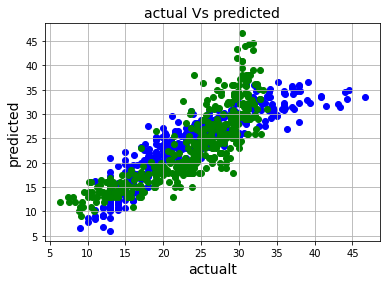

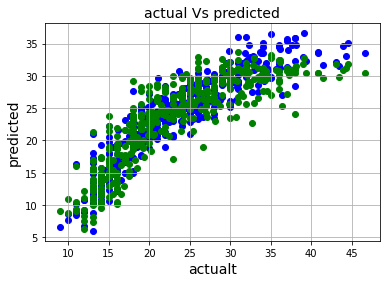

In [ ]:

#plt.show()
mpg = (45.82826481701349) + (-0.04431582)* df['horsepower'] + (-0.00595438)* df['weight']
#print (mpg)
plt.scatter(df['mpg_target'],model.predict(X), color='blue')
plt.scatter(((45.82826481701349) + (-0.04431582)* df['horsepower'] + (-0.00595438)* df['weight']),df['mpg_target'], color='green')
plt.title('actual Vs predicted', fontsize=14)
plt.xlabel('actualt', fontsize=14)
plt.ylabel('predicted',fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df['mpg_target'],model.predict(X), color='blue')
plt.scatter(df['mpg_target'],((45.82826481701349) + (-0.04431582)* df['horsepower'] + (-0.00595438)* df['weight']), color='green')
plt.title('actual Vs predicted', fontsize=14)
plt.xlabel('actualt', fontsize=14)
plt.ylabel('predicted',fontsize=14)
plt.grid(True)
plt.show()